# Project: No show appointments in Brazil Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be analyzing data associated with no-show medical appointments in Brazil. In particular we will be investigating trends in individuals who show up for their schedule appointment versus individuals who don’t show up for the appointment.

We are going to be looking at what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


1. Relationship between gender and patients that showed up ?
2. Do having a medical scholarship affect patients that show up ?
3. Any of the diseases affect patients that show up ?


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [5]:
# checking data shape
df.shape

(110527, 14)

In [6]:
#checking for whether null values exists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As you can see there are absolutely no columns that consist of null values

In [7]:
#check summary statistics for our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [9]:
#drop all rows with handicap of 2, 3 and 4 because Handicap is binary and requires only 0 and 1
df.drop (index =(df.query('Handcap == 2 | Handcap == 3 | Handcap == 4').index), axis=0, inplace=True)

In [10]:
df['Handcap'].unique()

array([0, 1], dtype=int64)

In [11]:
#notice how the minimum age is -1, that is impossible. i will filter for ages less that 0
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#since it is only one row , i will drop it 
df.drop (index =(df.query('Age < 0').index), axis=0, inplace=True)

In [13]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [14]:
#check for duplicated rows
df.duplicated().sum()

0

### Data Cleaning (Replace this with more specific notes!)

In [15]:
#change all the coulumn labels to lower case for consistency
df.rename(columns = lambda x : x.lower(), inplace = True)

In [16]:
#drop patientID and Appointmentid columns as they are irrelevant to the analysis
df.drop(['patientid','appointmentid'], axis = 1, inplace = True)

In [17]:
#fix column label typos and seperate column labels with two words with '_' abd change 'No_show' to 'show' to avoid confusion

dict = {'scheduledday': 'scheduled_day',
        'appointmentday': 'appointment_day',
        'hipertension': 'hypertension',
       'handcap': 'handicap',
        'no-show': 'show'}
df.rename(columns = dict, inplace=True)

In [18]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
#convert scheduled_day, appointment_date to datetime and creating new columns for scheduled date and appoint date in order to do the subtraction to get the number of 
#days that pateints had to wait

#change scheduled_day to datetime format
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

#change appointment_day to datetime format
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

#create new columns for appointment_date and scheduled_date

df['scheduled_date'] = df['scheduled_day'].dt.date
df['appointment_date'] = df['appointment_day'].dt.date


In [20]:
#create column for wait days = days pateient scheduled their appointment - day patient was appointed to come in
df['wait_days'] = (df['appointment_date']-df['scheduled_date']).dt.days

In [21]:
#check for errors in schedule timing. where wait days are less than 0
df.query('wait_days < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_date,appointment_date,wait_days
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-10,2016-05-09,-1
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-18,2016-05-17,-1
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-05,2016-05-04,-1
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-11,2016-05-05,-6
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-04,2016-05-03,-1


In [22]:
#filter records to only consist of records of wait days >= 0

df.drop(index =(df.query('wait_days < 0').index), axis=0, inplace=True)

In [23]:
#check to see if dater is flitered
df.query('wait_days < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_date,appointment_date,wait_days


In [24]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,wait_days
count,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,37.07092,0.098285,0.196842,0.071609,0.030384,0.018491,0.321196,10.187524
std,23.09791,0.297701,0.397614,0.257840,0.171642,0.134720,0.466938,15.257955
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [25]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_date,appointment_date,wait_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : We are going to be looking at what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? (Show is my dependent variable and the rest of the column labels are my independent variables)

In [26]:
#lets visualize number of show vs no show
#creating masks to for show and no show

df_show = df.query('show == "Yes"')
df_no_show = df.query('show == "No" ')

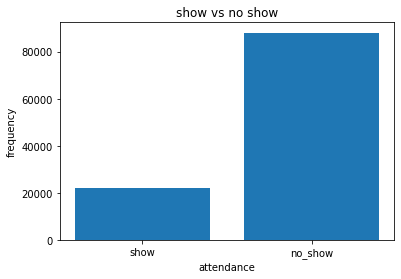

In [27]:
# location = [1,2]
# heights = [df_show['show'].count(),df_no_show['show'].count()]
# labels = ['show', 'no_show']

# plt.bar(location,heights, tick_label = labels)
# plt.title('show vs no show')


def create_plot(location,heights,labels,title,ylabel,xlabel):
    location = location
    heights = heights
    labels = labels
    
    plt.bar(location,heights, tick_label = labels)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
create_plot([1,2],[df_show['show'].count(),df_no_show['show'].count()],['show', 'no_show'],'show vs no show','frequency','attendance')

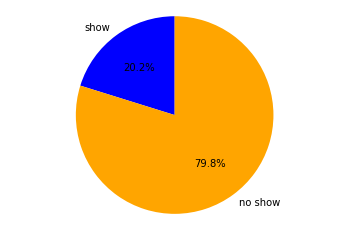

In [28]:
#to make visulaization better i will show the show vs no show in percentage
labels= ['show', 'no show']

colors=['blue','orange']

sizes = [df_show['show'].count(),df_no_show['show'].count()]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

As you can see above 79.8% of patients did not show up to their appointment while the remaining 20.2% showed up to their appointment. We are going to dive deeper to find out reasons for this large difference

## Relationship between Gender and patients who showed up for the appointment

Text(0.5, 1.0, 'Gender vs frequency of showing up to apppointments')

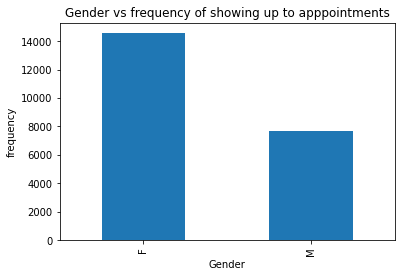

In [29]:
df_show['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('frequency')
plt.title('Gender vs frequency of showing up to apppointments')

As you can see more women showed up for their appointment compared to the men, this can be assumed to the fact that women are more likely to take care of their health compared to men

## Do having a medical scholarship affect patients that show up?

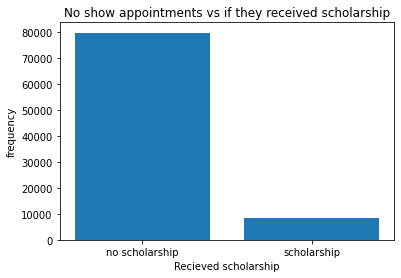

In [30]:
#lets check how many people has a scholarship that did not show up to their appointment
# location = [1,2]
# heights = [df_no_show['scholarship'].value_counts()[0],df_no_show['scholarship'].value_counts()[1]]
# labels = ['no scholarship', 'scholarship']

# plt.bar(location,heights, tick_label = labels)
# plt.title('No show appointments vs if they received scholarship')


create_plot([1,2],[df_no_show['scholarship'].value_counts()[0],df_no_show['scholarship'].value_counts()[1]],['no scholarship', 'scholarship'],'No show appointments vs if they received scholarship','frequency','Recieved scholarship')


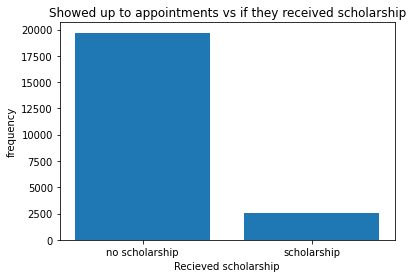

In [31]:
# #lets check how many people has a scholarship that showed up to their appointment
# location = [1,2]
# heights = [df_show['scholarship'].value_counts()[0],df_show['scholarship'].value_counts()[1]]
# labels = ['no scholarship', 'scholarship']

# plt.bar(location,heights, tick_label = labels)
# plt.title('Showed up to appointments vs if they received scholarship')

create_plot([1,2],[df_show['scholarship'].value_counts()[0],df_show['scholarship'].value_counts()[1]],['no scholarship', 'scholarship'],'Showed up to appointments vs if they received scholarship','frequency','Recieved scholarship')

As we can we from the two graphs above,patients without medical scholarships showed up to appointments compared to patients with medical scholarship. This is very odd because you would assume that people with medical aid would suprpass people without

In [32]:
df.query('scholarship == 1')['show'].value_counts()

No     8266
Yes    2577
Name: show, dtype: int64

## Any of the condition affect patients that show up ?

### comparing individuals who arent affected by any of the conditions vs an individual thats affected by at least one of the disease vs individuals affected by both conditions who showed up for their appintments

In [33]:
df_no_condition = df_show.query('hypertension == 0 & diabetes == 0')
df_atleast_1_condition = df_show.query('hypertension == 1 | diabetes == 1')
df_both_conditions = df_show.query('hypertension == 1 & diabetes == 1')

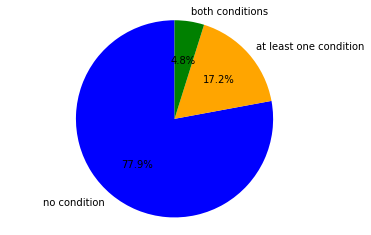

In [34]:
#to make visulaization better i will show the show vs no show in percentage
labels= ['no condition', 'at least one condition', 'both conditions']

colors=['blue','orange', 'green']

sizes = [df_no_condition['show'].count(), df_atleast_1_condition['show'].count(), df_both_conditions['show'].count()]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

As you can see it is more likely that a patient without Hypertension or Diabetes is likely to show up for their appointment

Text(0.5, 1.0, 'Age vs frequency of showing up to apppointments')

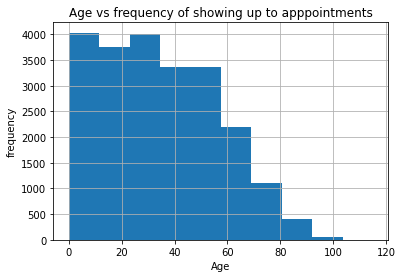

In [35]:
df_show['age'].hist()
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age vs frequency of showing up to apppointments')

Text(0.5, 1.0, 'Age vs frequency of not showing up to apppointments')

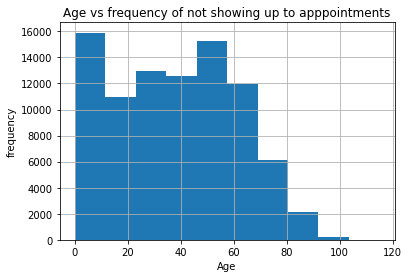

In [36]:
df_no_show['age'].hist()
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age vs frequency of not showing up to apppointments')

Age group between 0 - 30 are most likely to show up for their appointments compared to older age group

<a id='conclusions'></a>
## Conclusions




In conclusion this data set is very inconsistent 
- 79.8% of patients did not show up to their appointment while the remaining 20.2% showed up to their appointment.
-  women showed up for their appointment compared to the men
- it is more likely that a patient without Hypertension or Diabetes is likely to show up for their appointment
- Age group between 0 - 30 are most likely to show up for their appointments compared to older age group

## LIMITATIONS
- Distance from neighborhood to hospital could be a huge factor in which caused lack of attendance to appoiintments
- Dataset had a bit of confusion with the handicap column, it had alot of values with 2,3,4 when it was supposed to be only 0 and 1 in binary which meant true and false
- the sms_receieved column according to the author supposed to signify the number of sms a patient receieved but only had the binary values of 0 and 1. i assume the sms receieved and handicap columns were switched.